## Forecasting Indian Benchmark Index Sensex with ARIMA: A Time Series Approach

In [1]:
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import statsmodels as sm
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [2]:
# downloading the data from yfinance
ticker = '^BSESN'
start_date = '2014-05-16'
end_date = '2025-08-31'
df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Downloading Data of 26/5/2014-31/8/2025
df.reset_index()

Price,Date,Close,High,Low,Open,Volume
Ticker,,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN
0,2014-05-16,24121.740234,25375.630859,23873.160156,24271.539062,35700
1,2014-05-19,24363.050781,24448.470703,24107.990234,24340.320312,23500
2,2014-05-20,24376.880859,24587.160156,24299.529297,24555.310547,19000
3,2014-05-21,24298.019531,24419.539062,24156.470703,24404.480469,18000
4,2014-05-22,24374.400391,24524.759766,24326.480469,24415.419922,14500
...,...,...,...,...,...,...
2768,2025-08-22,81306.851562,81993.609375,81291.773438,81951.476562,6700
2769,2025-08-25,81635.906250,81799.062500,81364.859375,81501.062500,9700
2770,2025-08-26,80786.539062,81450.281250,80685.976562,81377.390625,20500


The country's economic indicators were performing well in advance of the result in expectation of a BJP win, on the perception that Modi is business-friendly. The benchmark BSE Sensex and CNX Nifty indices hit record highs and the Indian rupee strengthened following months of poor performance.[293] On the result day, as early vote counts gave the BJP a majority lead, the Sensex reached a record high of 25,375.63 points.[294] It ended the day at a new closing high of 24,121.74. The Nifty reached a record high of 7,563.50, before ending the day at a new closing high of 7,203.[

https://www.gulf-times.com/story/392277/sensex-hits-record-high;-rupee-at-11-month-peak
^Riley, Charles (16 April 2014). "Election optimism drives India markets despite pitfalls". CNN. Archived from the original on 13 June 2021
https://www.financialexpress.com/news/live-stock-markets-bse-sensex-soars-1100-pts-to-over-25000mark-nifty-breaches-7400-as-lok-sabha-election-results-pour-in/1251234

In [4]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN
count,2773.000000,2773.000000,2773.000000,2773.000000,2.773000e+03
mean,45925.392958,46176.846222,45675.771094,45963.307982,1.277353e+05
std,18234.842983,18305.090611,18154.462384,18229.103280,1.419561e+06
min,22951.830078,23142.960938,22494.609375,23060.390625,0.000000e+00
25%,29365.300781,29505.980469,29163.539062,29369.900391,8.400000e+03
50%,38628.289062,38892.500000,38474.660156,38730.929688,1.130000e+04
75%,60059.058594,60364.769531,59776.660156,60087.980469,1.590000e+04
max,85836.117188,85978.250000,85474.578125,85893.843750,3.181510e+07


In [7]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()


In [6]:
print(df.isnull().sum())
print(df.isna().sum())
print(df.duplicated().sum())

Price   Ticker
Close   ^BSESN    0
High    ^BSESN    0
Low     ^BSESN    0
Open    ^BSESN    0
Volume  ^BSESN    0
dtype: int64
Price   Ticker
Close   ^BSESN    0
High    ^BSESN    0
Low     ^BSESN    0
Open    ^BSESN    0
Volume  ^BSESN    0
dtype: int64
0


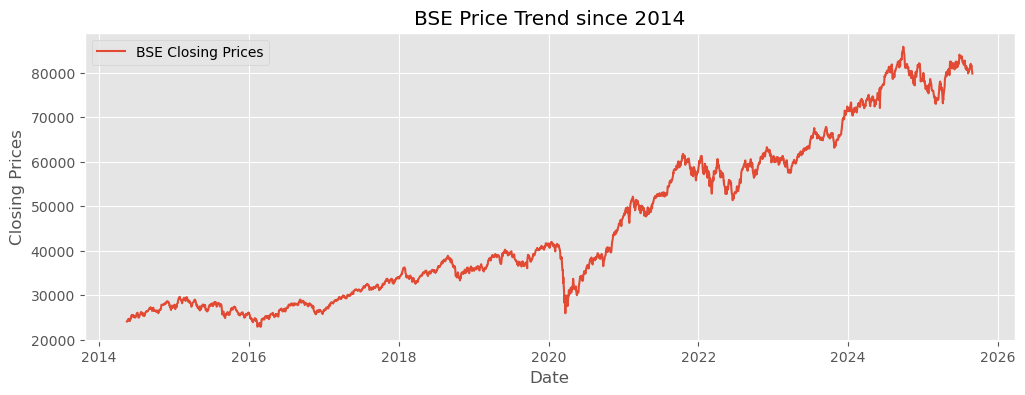

In [7]:
plt.figure(figsize=(12,4))
plt.plot(df['Close'],label='BSE Closing Prices')
plt.title('BSE Price Trend since 2014')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.show()

In [4]:
# Creating target column for analysis
target_col=df[['Close']].copy().astype(int)
target_col.head(5)

Price,Close
Ticker,^BSESN
Date,
2014-05-16,24121
2014-05-19,24363
2014-05-20,24376
2014-05-21,24298
2014-05-22,24374


## Augumented dickey-fuller test for Stationary
- Null Hypothesis (H₀): The time series has a unit root and is non-stationary. - 
Alternative Hypothesis (H₁): The time series is stationary or trend-stationary- Critical Value (alpha=0.05)
- 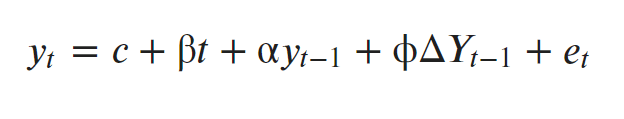
where,
y(t-1) = lag 1 of time series
delta Y(t-1) = first difference of the series at time (t-1)

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(target_col['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: 0.14166362033781293
p-value: 0.9687932066896812


- Therefore data is not stationary ,we will difference the data

In [10]:
# First difference
target_col['Close_Diff'] = target_col['Close'].diff()

# Drop NaN created by differencing
diff_series = target_col['Close_Diff'].dropna()

# ADF Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(diff_series)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -21.82992148955441
p-value: 0.0


In [11]:
# Kpss Test
## Kpss Test
from statsmodels.tsa.stattools import kpss
kpss_test=kpss(target_col['Close_Diff'].dropna(),regression='ct')
print(f'KPSS Stats: {round(kpss_test[0],2)}')
print(f'p-value:{kpss_test[1]}')
print('critical values')
for key,value in kpss_test[3].items():
    print(f' {key}:{value}')

KPSS Stats: 0.03
p-value:0.1
critical values
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216


C:\Users\swaya\AppData\Local\Temp\ipykernel_7656\3805758994.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test=kpss(target_col['Close_Diff'].dropna(),regression='ct')


In [5]:
target_col

Price,Close
Ticker,^BSESN
Date,
2014-05-16,24121
2014-05-19,24363
2014-05-20,24376
2014-05-21,24298
2014-05-22,24374
...,...
2025-08-22,81306
2025-08-25,81635


<Axes: ylabel='Density'>

<Figure size 1500x600 with 0 Axes>

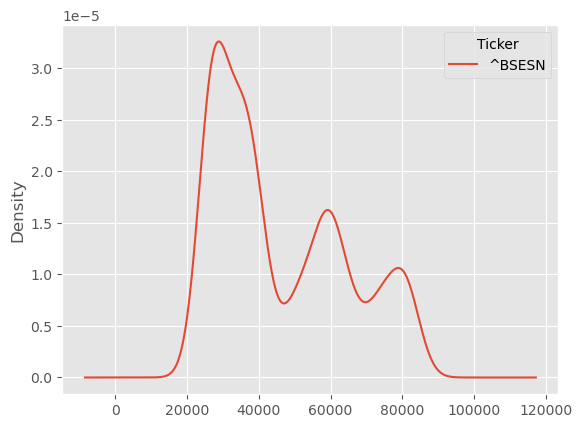

In [13]:
plt.figure(figsize=(15,6))
df['Close'].plot(kind='kde')

In [21]:
bse=pd.read_csv('Sensex.csv',usecols=['Date','value'])
bse.index=bse['Date']

In [31]:
data=bse.value

In [37]:
ema

Date
2014-05-16    24121.740234
2014-05-19    24124.141334
2014-05-20    24126.656155
2014-05-21    24128.361264
2014-05-22    24130.809414
                  ...     
2025-08-22    79726.324606
2025-08-25    79745.325419
2025-08-26    79755.685754
2025-08-28    79758.918436
2025-08-29    79759.423212
Name: value, Length: 2773, dtype: float64

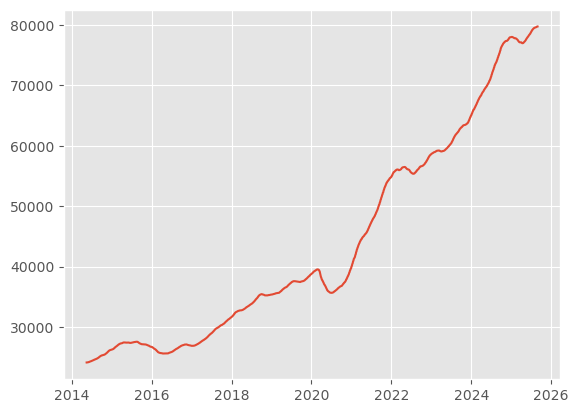

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts=pd.Series(data,index=data.index)
ema_window = 200 # 30-day Smoothing
ema = df['Close'].ewm(span=ema_window, adjust=False).mean()
plt.plot(ema, label=f'{ema_window}-Day EMA')

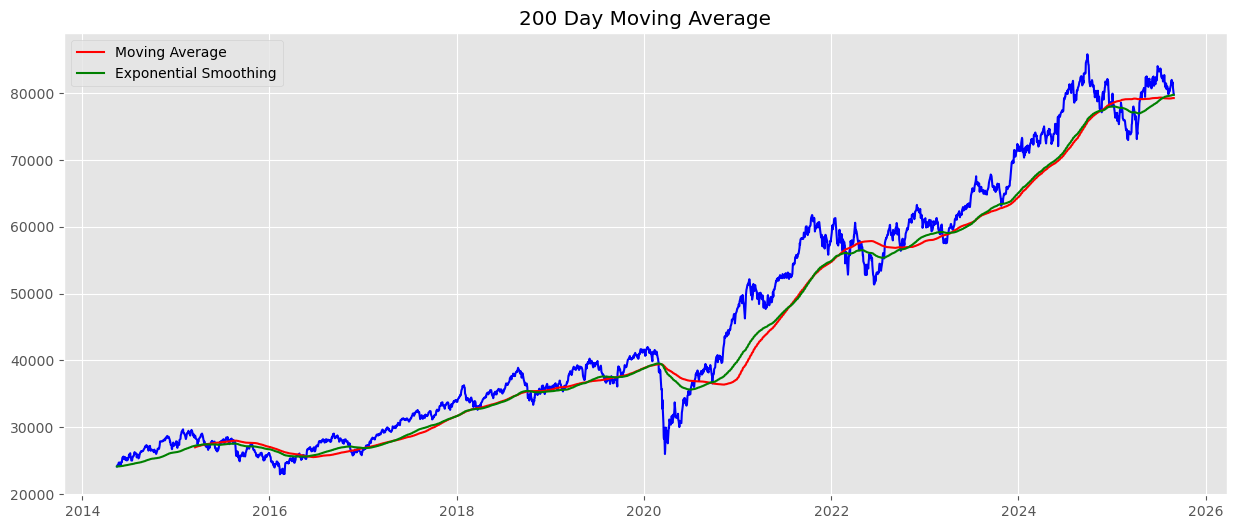

In [43]:
## Moving Average
rolmean = target_col['Close'].rolling(200).mean()
rolstd = target_col['Close'].rolling(12).std()

plt.figure(figsize=(15,6))
plt.plot(target_col, color='blue')
plt.plot(rolmean, color='red', label='Moving Average')
plt.plot(ema,color='green',label='Exponential Smoothing')

plt.legend(loc='best')
plt.title('200 Day Moving Average')
plt.savefig('Moving-Average.png')

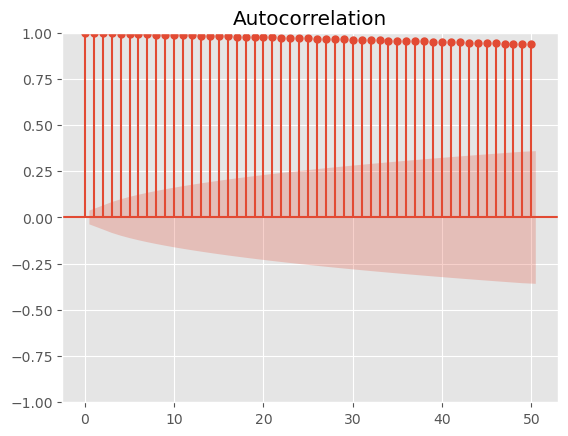

<Figure size 1500x600 with 0 Axes>

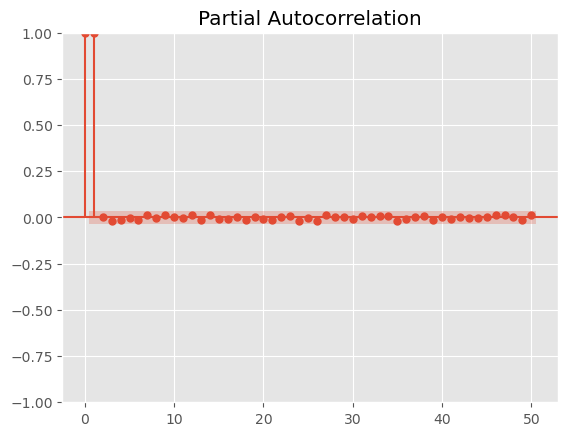

<Figure size 1500x600 with 0 Axes>

In [15]:
## Plotting ACF and Pacf plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Close'], lags=50)
plt.figure(figsize=(15,6))
plt.show()

plot_pacf(df['Close'], lags=50)
plt.figure(figsize=(15,6))
plt.show()

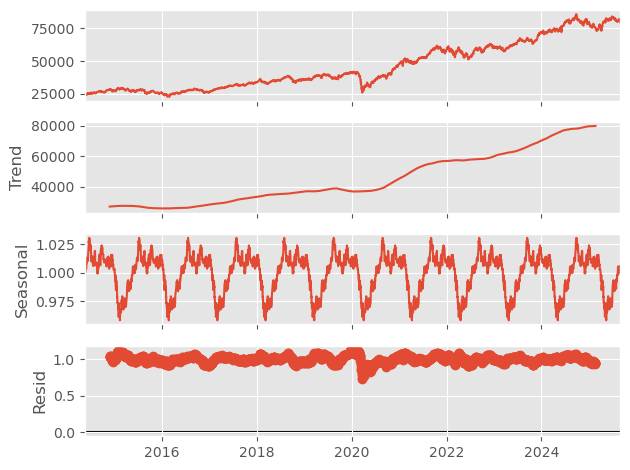

<Figure size 1500x600 with 0 Axes>

In [16]:

# Checking the seasonal decompose
# Multiplicative Models
#multiplicative decomposition when the magnitude of seasonal fluctuations changes proportionally with the trend. 
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=252)  # ~252 trading days/year
decomposition.plot()
plt.figure(figsize=(15,6))
plt.show()
# Strict Stationary

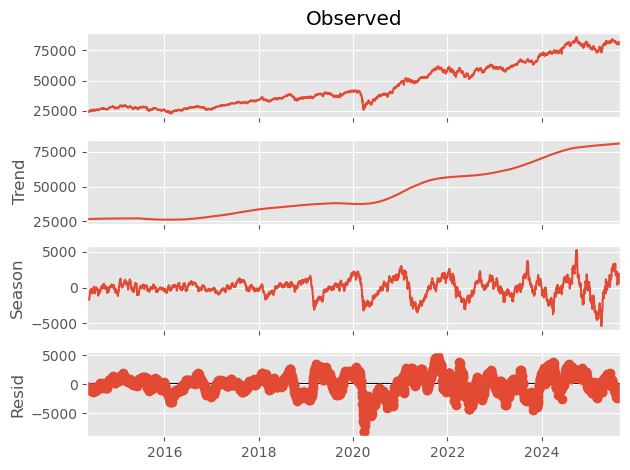

In [17]:
# Better to find seasonal patterns using STL decomposition
# Stl handles outliers
# only handles additive models
# Classical decompostion in multiplicative decomposition
from statsmodels.tsa.seasonal import STL
stl=STL(df['Close'],period=252)
result=stl.fit()
result.plot()
plt.show()
# Weak stationary

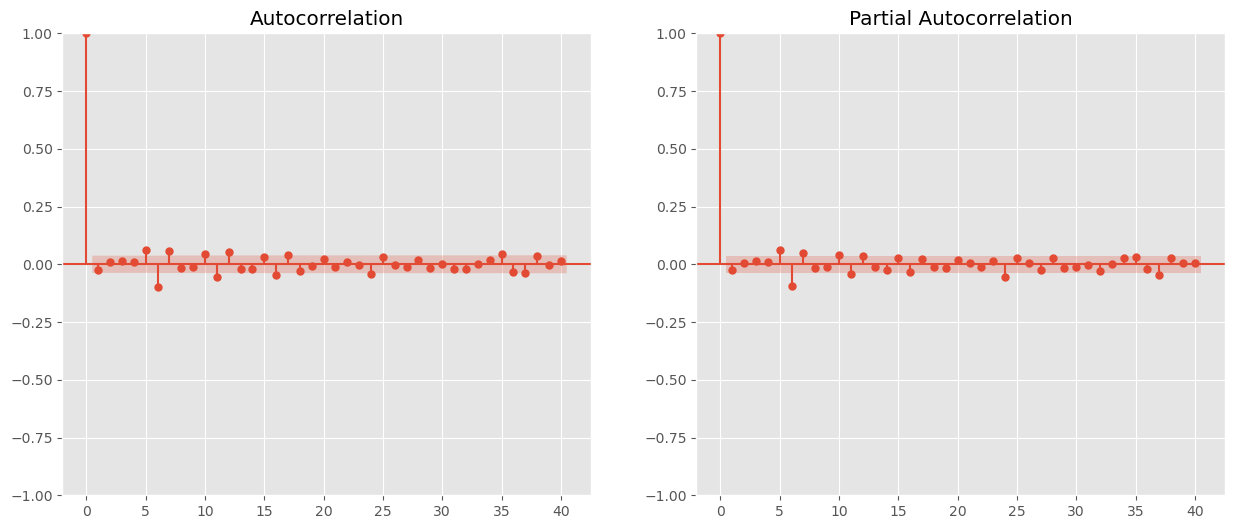

In [18]:
# Building the model using ARIMA algorithm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use log returns as the stationary series
log_ret = np.log(df['Close']).diff().dropna()

# ACF and PACF plots on logs of closing price
fig, ax = plt.subplots(1,2, figsize=(15,6))
plot_acf(log_ret, lags=40, ax=ax[0])
plot_pacf(log_ret, lags=40, ax=ax[1])
plt.show()

In [19]:
# Arima Modeling
from statsmodels.tsa.arima.model import ARIMA

# Build ARIMA model ( p=3, d=1, q=2)
model = ARIMA(df['Close'], order=(3,1,2))  # direct on price with differencing
model_fit = model.fit()

print(model_fit.summary())

C:\Users\swaya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\swaya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\swaya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 ^BSESN   No. Observations:                 2773
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -20935.684
Date:                Wed, 10 Sep 2025   AIC                          41883.368
Time:                        20:12:33   BIC                          41918.932
Sample:                             0   HQIC                         41896.212
                               - 2773                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5421      0.384      1.410      0.158      -0.211       1.295
ar.L2         -0.7654      0.334     -2.293      0.022      -1.420      -0.111
ar.L3         -0.0019      0.017     -0.113      0.9

In [20]:
# Train-Test Split (last 365 days as test set)

train = df['Close'][:-365]
test = df['Close'][-365:]

In [21]:
from pmdarima.arima import auto_arima

automodel = auto_arima(df['Close'], start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=True,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=41874.404, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=41871.438, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=41872.635, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=41872.664, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=41874.702, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.151 seconds


In [67]:
test

Ticker,^BSESN
Date,
2022-04-18,57166.738281
2022-04-19,56463.148438
2022-04-20,57037.500000
2022-04-21,57911.679688
2022-04-22,57197.148438
...,...
2025-08-22,81306.851562
2025-08-25,81635.906250
2025-08-26,80786.539062


In [59]:

train = df['Close'][:-832]
test = df['Close'][-832:]
automodel = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
forecast = automodel.predict(n_periods=len(test))
forecast=pd.Series(forecast.values,index=test.index,name='forecast')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=28768.426, Time=5.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28766.505, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28768.420, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28768.422, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28768.254, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=28770.422, Time=2.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 8.422 seconds


C:\Users\swaya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


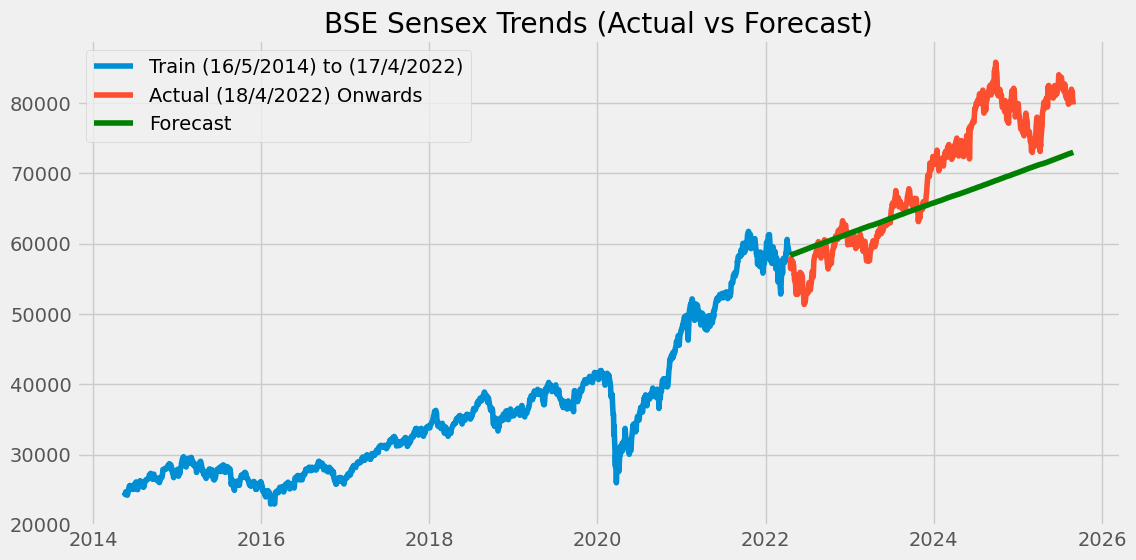

In [72]:
#plot the predictions for validation set
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.plot(train, label='Train (16/5/2014) to (17/4/2022)')
plt.plot(test, label='Actual (18/4/2022) Onwards')
plt.plot(forecast, label='Forecast',color='green')
plt.title('BSE Sensex Trends (Actual vs Forecast)')
plt.legend()
plt.show()

In [64]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test,forecast))
print(rms)

6701.636070442376


- Data Collection & Preprocessing

Collected daily Nifty50 data using yfinance.

Focused on the Close price, ensuring stationarity through differencing and rolling statistics.

Verified stationarity with the ADF test.

- Model Selection & Implementation

Chose the ARIMA model as a traditional statistical approach for time series forecasting.

Conducted model fitting with tuned parameters (p,d,q) based on ACF/PACF analysis.

- Evaluation

Split the dataset into training (historical) and testing (last 1 year).

Evaluated predictions using RMSE and MAE, with results indicating reasonable accuracy.

Visualized actual vs forecasted values to confirm model performance.

- Key Insights

The ARIMA model captures short-term trends and seasonality fairly well, but tends to lag in sudden market shocks (as expected in financial data).

Statistical models like ARIMA are interpretable and effective baselines, though hybrid approaches (ARIMA + ML) could improve accuracy.L) could improve accuracy.L) could improve accuracy.

In [42]:
## when model the all time data (forecast) then data should be strict stationary
## when model is not all time then data should be weak stationary

In [43]:
## Kpss Test
from statsmodels.tsa.stattools import kpss
kpss_test=kpss(df['Close'],regression='ct')
print(f'KPSS Stats: {round(kpss_test[0],2)}')
print(f'p-value:{kpss_test[1]}')
print('critical values')
for key,value in kpss_test[3].items():
    print(f' {key}:{value}')

KPSS Stats: 1.51
p-value:0.01
critical values
 10%:0.119
 5%:0.146
 2.5%:0.176
 1%:0.216


C:\Users\swaya\AppData\Local\Temp\ipykernel_15820\2017072613.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test=kpss(df['Close'],regression='ct')


In [46]:
import numpy as np
from scipy.stats import ks_2samp
def ks_test_stationarity(series):
    split=len(series)//2
    series_first=series[:split]
    series_sec=series[split:]
    stat,p_value=ks_2samp(series_first,series_sec)
    return stat,p_value
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(df['Close'])
print(ks_stat_strict,ks_pvalue_strict)

[0.85579245] [0.]


In [52]:
#differencing
#transformation: Logarithmic , Power , Box Cox
#Detrending 
#seasonal adjustment
# White Noise and Random Walk

In [53]:
# Random Values (Current or Future depend on previous values)
# Non-Stationary data
# 1 time differentiation
# Acf & Pacf (q&p)
# Ljung box test

In [55]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(df['Close'],lags=10,return_df=True)
#there is autocorrelation in closing price(random walk)

,lb_stat,lb_pvalue
1,2769.339450,0.0
2,5533.058714,0.0
3,8290.951335,0.0
4,11042.843958,0.0
5,13788.712592,0.0
6,16528.402639,0.0
7,19262.130674,0.0
8,21989.876170,0.0
9,24711.839450,0.0
10,27428.104528,0.0


In [56]:
#ar(past values)
#ma(residuals)
#arima (I = Differencing Order of Non-Stationary Data)
#arma (Both ar(p) and ma(q) )
#sarimax
#arimax

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [59]:
target_col

Price,Close,Close_Diff
Ticker,^BSESN,
Date,,
2014-05-16,24121,NaN
2014-05-19,24363,242.0
2014-05-20,24376,13.0
2014-05-21,24298,-78.0
2014-05-22,24374,76.0
...,...,...
2025-08-22,81306,-694.0
2025-08-25,81635,329.0


In [60]:
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(target_col['Close'])

ADF Statistic: 0.14166362033781293
p-value: 0.9687932066896812
Non-Stationary


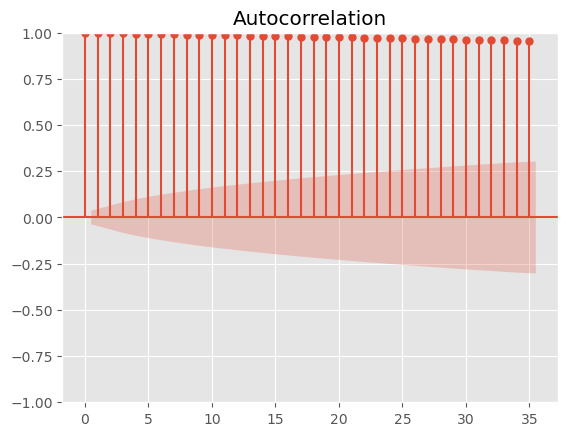

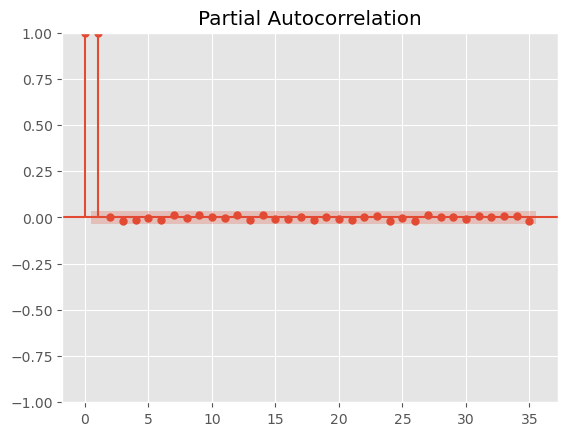

In [63]:
plot_acf(target_col['Close'])
plot_pacf(target_col['Close'])
plt.show()

In [49]:
df

Ticker,^BSESN
Date,
2014-05-16,24121.740234
2014-05-19,24363.050781
2014-05-20,24376.880859
2014-05-21,24298.019531
2014-05-22,24374.400391
...,...
2025-08-22,81306.851562
2025-08-25,81635.906250
2025-08-26,80786.539062
